In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import OneHotEncoder
from scipy.spatial.distance import pdist

soale 2

In [2]:
df = pd.read_csv('coins_data.csv')
df

,Symbol,Volume,MarketCap,TotalSupply,ProofType,Network
0,LEO,1.823284e+06,3586504072,"985,239,504",PoS,Ethereum
1,UNI,9.918768e+07,3992451215,"1,000,000,000",PoS,Ethereum
2,WBTC,1.415410e+08,4237575489,"163,106",PoW,Ethereum
3,AVAX,2.197065e+08,4901630273,"431,804,080",PoS,Avalanche
4,DAI,2.177113e+08,5513660644,"5,347,888,596",stablecoin,Ethereum
5,SHIB,2.479944e+08,5606251419,"589,589,040,239,380",PoS,Ethereum
6,LTC,5.913019e+08,5729295460,"84,000,000",PoW,Litecoin
7,TRX,2.719028e+08,6018922345,"88,996,805,683",PoS,Tron
8,DOT,2.035592e+08,6659549868,"1,364,182,225",PoW,Polkadot
9,MATIC,4.232990e+08,8053184610,"10,000,000,000",PoS,Polygon


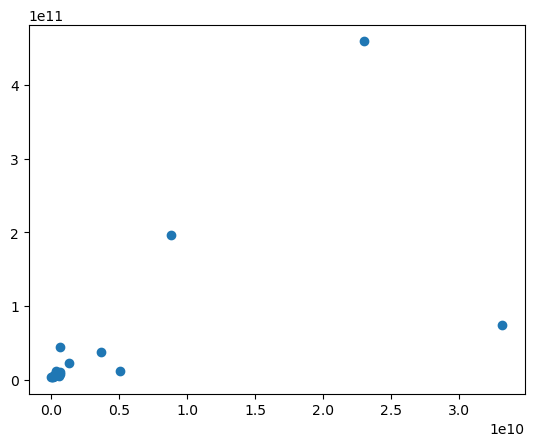

In [3]:
Data = np.stack((df['Volume'], df['MarketCap']), axis=1)
plt.scatter(df['Volume'], df['MarketCap'])

In [4]:
dist = pdist(Data, metric='euclidean')

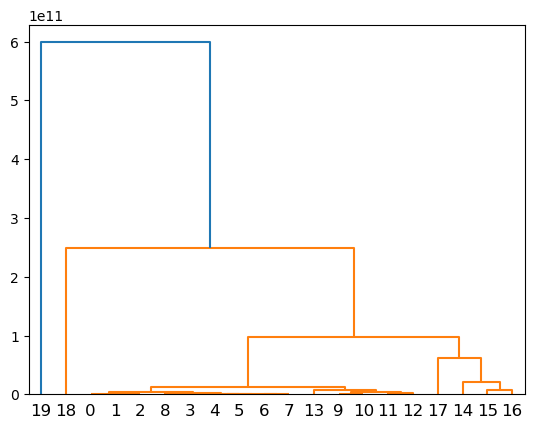

In [5]:
linkage_data = linkage(dist, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [6]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(np.array(df['ProofType']).reshape(-1,1)).toarray()
print(encoded)

[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [7]:
volume = np.array(df['Volume'])
market_cap = np.array(df['MarketCap'])
volume = (volume - np.min(volume)) / (np.max(volume) - np.min(volume))
market_cap = (market_cap - np.min(market_cap)) / (np.max(market_cap) - np.min(market_cap))
volume = np.expand_dims(volume, 1)
market_cap = np.expand_dims(market_cap, 1)
print(volume[:5])
print(market_cap[:5])

[[0.        ]
 [0.00293729]
 [0.00421501]
 [0.00657311]
 [0.00651292]]
[[0.        ]
 [0.00089122]
 [0.00142936]
 [0.00288723]
 [0.00423089]]


In [8]:
Data = np.append(encoded, volume, axis=1)
Data = np.append(Data, market_cap, axis=1)
print(Data)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.93729393e-03 8.91217588e-04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 4.21501166e-03 1.42936416e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 6.57311084e-03 2.88723205e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 6.51292116e-03 4.23088538e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.42650233e-03 4.43415944e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 1.77834187e-02 4.70429070e-03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.14777173e-03 5.34013845e-03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 6.08597937e-03 6.74657405e-03]
 [0.000000

In [9]:
print(Data.shape)
dist = pdist(Data, metric='euclidean')
print(dist.shape)

(20, 7)
(190,)


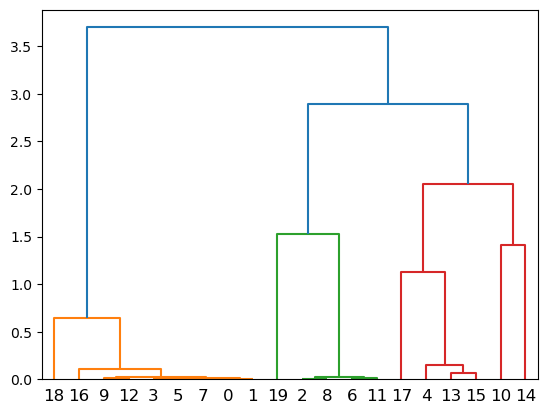

In [10]:
linkage_data = linkage(dist, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [19]:
def rmc(s):
    s = float(s.replace(',',''))
    return s

In [21]:
totalsupply = np.array(df['TotalSupply'])
totalsupply = np.array(list(map(rmc, totalsupply)))
totalsupply = (totalsupply - np.min(totalsupply)) / (np.max(totalsupply) - np.min(totalsupply))
totalsupply = np.expand_dims(totalsupply, 1)
print(totalsupply[:5])

[[1.67078479e-06]
 [1.69582001e-06]
 [0.00000000e+00]
 [7.32104813e-07]
 [9.07025933e-06]]


In [22]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(np.array(df['Network']).reshape(-1,1)).toarray()
print(encoded)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
Data = np.append(encoded, volume, axis=1)
Data = np.append(Data, market_cap, axis=1)
print(Data)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.93729393e-03 8.91217588e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.21501166e-03 1.42936416e-03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.57311084e-03 2.88723205e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00


In [24]:
print(Data.shape)
dist = pdist(Data, metric='euclidean')
print(dist.shape)

(20, 14)
(190,)


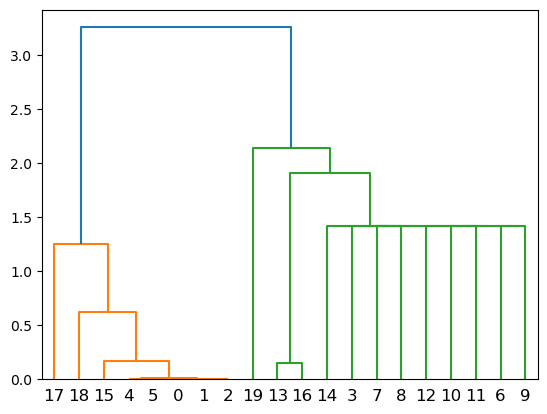

In [25]:
linkage_data = linkage(dist, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [26]:
Data = np.append(totalsupply, volume, axis=1)
Data = np.append(Data, market_cap, axis=1)
print(Data)

[[1.67078479e-06 0.00000000e+00 0.00000000e+00]
 [1.69582001e-06 2.93729393e-03 8.91217588e-04]
 [0.00000000e+00 4.21501166e-03 1.42936416e-03]
 [7.32104813e-07 6.57311084e-03 2.88723205e-03]
 [9.07025933e-06 6.51292116e-03 4.23088538e-03]
 [1.00000000e+00 7.42650233e-03 4.43415944e-03]
 [1.42195476e-07 1.77834187e-02 4.70429070e-03]
 [1.50946908e-04 8.14777173e-03 5.34013845e-03]
 [2.31350827e-06 6.08597937e-03 6.74657405e-03]
 [1.69606899e-05 1.27151001e-02 9.80616399e-03]
 [9.48705780e-07 1.90684100e-02 1.04577777e-02]
 [2.39725069e-04 1.89855393e-02 1.48319012e-02]
 [6.14735387e-05 1.09502864e-02 1.87106159e-02]
 [3.75460367e-06 1.53331309e-01 1.87629889e-02]
 [1.69589682e-04 4.06484927e-02 4.38974280e-02]
 [4.33185739e-05 1.10532810e-01 7.40529425e-02]
 [2.60660430e-07 2.04833000e-02 9.00404101e-02]
 [1.46905189e-06 1.00000000e+00 1.55877305e-01]
 [2.03677628e-07 2.66741857e-01 4.22606052e-01]
 [3.28115190e-08 6.92833799e-01 1.00000000e+00]]


In [27]:
print(Data.shape)
dist = pdist(Data, metric='euclidean')
print(dist.shape)

(20, 3)
(190,)


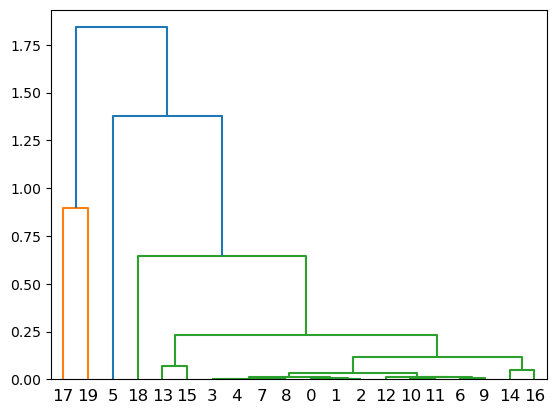

In [28]:
linkage_data = linkage(dist, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()